<a href="https://colab.research.google.com/github/Rafiul-124/ColabProject/blob/main/Networking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
file_path = "/content/drive/My Drive/network_engineering/network_engineering_trends.csv"




Mounted at /content/drive
         date             theme           source  github_stars  job_postings  \
0  2021-09-01        Private 5G  github_activity     40.489504     92.654756   
1  2023-11-01  AIOps/Automation      job_posting     56.859315    158.776217   
2  2025-04-01  Cloud Networking          funding     33.617606    103.706020   
3  2022-08-01    SASE/ZeroTrust          funding     41.441826    111.552254   
4  2015-12-01       Open RAN/5G      job_posting     17.857173     66.845275   

       papers    patents  funding_MUSD  salary_median_USD  \
0   68.665156   5.606728      0.073349       60368.522276   
1  101.409424  14.049704      1.411592       82006.419578   
2   64.147412  11.996143     24.989150       59965.577772   
3   54.873013   9.895490    269.070059       64698.065330   
4   26.120743   7.795197      0.028299       46137.955814   

   google_trends_index  sentiment  automation_risk_pct  \
0           108.244625  -0.582373            14.004074   
1         

In [71]:
df = pd.read_csv(file_path)

In [72]:
print(df.head())

         date             theme           source  github_stars  job_postings  \
0  2021-09-01        Private 5G  github_activity     40.489504     92.654756   
1  2023-11-01  AIOps/Automation      job_posting     56.859315    158.776217   
2  2025-04-01  Cloud Networking          funding     33.617606    103.706020   
3  2022-08-01    SASE/ZeroTrust          funding     41.441826    111.552254   
4  2015-12-01       Open RAN/5G      job_posting     17.857173     66.845275   

       papers    patents  funding_MUSD  salary_median_USD  \
0   68.665156   5.606728      0.073349       60368.522276   
1  101.409424  14.049704      1.411592       82006.419578   
2   64.147412  11.996143     24.989150       59965.577772   
3   54.873013   9.895490    269.070059       64698.065330   
4   26.120743   7.795197      0.028299       46137.955814   

   google_trends_index  sentiment  automation_risk_pct  \
0           108.244625  -0.582373            14.004074   
1           101.050268  -0.451171   

In [73]:
print(df.dtypes)

date                         object
theme                        object
source                       object
github_stars                float64
job_postings                float64
papers                      float64
patents                     float64
funding_MUSD                float64
salary_median_USD           float64
google_trends_index         float64
sentiment                   float64
automation_risk_pct         float64
geography                    object
lead_vendors                 object
stars_per_repo              float64
funding_per_round           float64
inter_theme_relationship     object
dtype: object


In [74]:
df['date'] = pd.to_datetime(df['date'])


In [75]:
print(df.shape)                 # rows × columns
print(df['date'].min(), df['date'].max())   # timeline coverage
print(df['theme'].nunique())    # number of unique themes
print(df['geography'].value_counts().head())
print(df.isna().mean().sort_values(ascending=False))  # missing %


(324085, 17)
2015-01-01 00:00:00 2027-09-01 00:00:00
10
geography
Global                                            139620
North America (largest), APAC (fastest growth)     94145
US, EU strong adoption                             38675
APAC, EU                                           32165
US, EU early adopters, APAC growing                19480
Name: count, dtype: int64
date                        0.0
theme                       0.0
source                      0.0
github_stars                0.0
job_postings                0.0
papers                      0.0
patents                     0.0
funding_MUSD                0.0
salary_median_USD           0.0
google_trends_index         0.0
sentiment                   0.0
automation_risk_pct         0.0
geography                   0.0
lead_vendors                0.0
stars_per_repo              0.0
funding_per_round           0.0
inter_theme_relationship    0.0
dtype: float64


In [13]:
print(df.shape)

(324085, 17)


In [14]:
missing_percent = df.isna().mean().sort_values(ascending=False)
print(missing_percent)


date                        0.0
theme                       0.0
source                      0.0
github_stars                0.0
job_postings                0.0
papers                      0.0
patents                     0.0
funding_MUSD                0.0
salary_median_USD           0.0
google_trends_index         0.0
sentiment                   0.0
automation_risk_pct         0.0
geography                   0.0
lead_vendors                0.0
stars_per_repo              0.0
funding_per_round           0.0
inter_theme_relationship    0.0
dtype: float64


In [27]:
# --- 1. Convert data types ---
df['date'] = pd.to_datetime(df['date'])
for col in ['theme', 'geography', 'source']:
    df[col] = df[col].astype('category')

In [28]:
df['theme'] = df['theme'].astype('category')
df['geography'] = df['geography'].astype('category')
df['source'] = df['source'].astype('category')


In [29]:
df.describe()


,date,github_stars,job_postings,papers,patents,funding_MUSD,salary_median_USD,google_trends_index,sentiment,automation_risk_pct,stars_per_repo,funding_per_round
count,324085,324085.000000,324085.000000,324085.000000,324085.000000,324085.000000,324085.000000,324085.000000,324085.000000,324085.000000,324085.000000,324085.000000
mean,2021-03-27 22:15:05.917892352,35.354880,80.386413,51.688768,7.630943,4.532127,58907.248198,71.653761,-0.184721,23.725666,18.420155,2.712510
min,2015-01-01 00:00:00,2.451758,12.168601,5.897561,0.000000,0.000000,29030.989457,0.000000,-1.199997,6.401533,0.750000,0.000000
25%,2018-08-01 00:00:00,22.498250,56.686811,36.116636,4.664118,0.220300,50019.450296,52.640666,-0.608745,18.206589,8.500000,0.120000
50%,2021-03-01 00:00:00,31.792555,76.469009,48.970024,7.046904,0.540065,58031.723373,71.969929,-0.201952,23.178514,13.750000,0.290000
75%,2023-12-01 00:00:00,44.307881,99.527716,64.243785,9.976784,1.138208,67042.191129,90.270572,0.200220,28.552301,23.500000,0.670000
max,2027-09-01 00:00:00,140.502957,245.741192,160.776498,35.517668,760.016267,97076.107531,119.999936,1.199976,52.699241,124.000000,629.540000
std,NaN,17.583139,31.325997,20.528193,3.999714,24.181080,11712.177954,24.294745,0.545806,7.551718,14.388170,16.018384


In [30]:
df['theme'].value_counts()
df['geography'].value_counts()


,count
geography,
Global,139620
"North America (largest), APAC (fastest growth)",94145
"US, EU strong adoption",38675
"APAC, EU",32165
"US, EU early adopters, APAC growing",19480


In [31]:
df.duplicated().sum()
df = df.drop_duplicates()


# **Analyze timeline coverage**

In [32]:
print(df['date'].min(), df['date'].max())


2015-01-01 00:00:00 2027-09-01 00:00:00


# **Otliers Check**

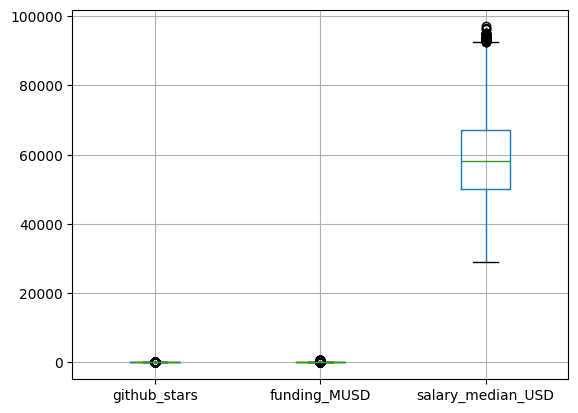

In [33]:
import matplotlib.pyplot as plt
df.boxplot(column=['github_stars','funding_MUSD','salary_median_USD'])
plt.show()


In [34]:
# --- 4. Visualize distributions and outliers ---
numeric_cols = df.select_dtypes(include='number').columns.tolist()

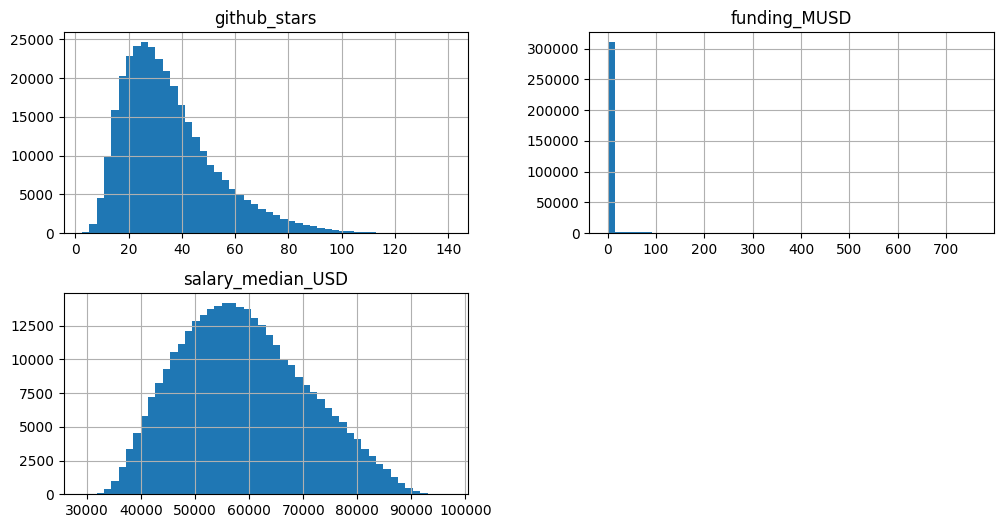

In [19]:
df[['github_stars','funding_MUSD','salary_median_USD']].hist(bins=50, figsize=(12,6))
plt.show()


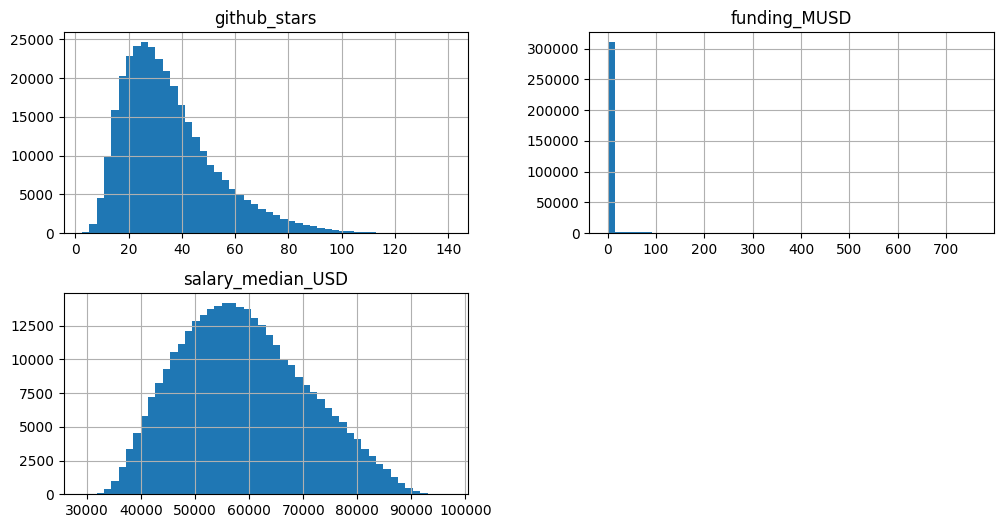

In [20]:
df[['github_stars','funding_MUSD','salary_median_USD']].hist(bins=50, figsize=(12,6))
plt.show()


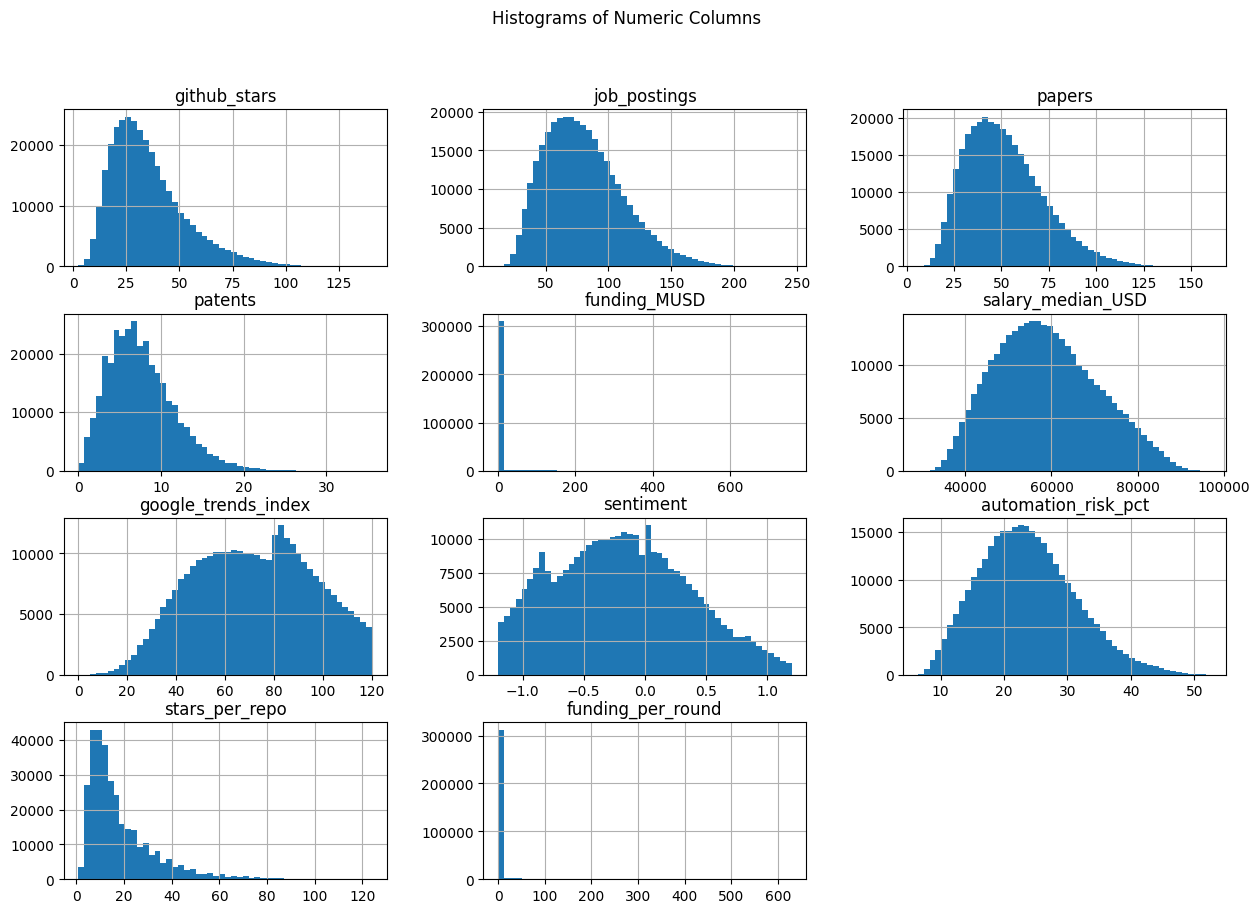

In [35]:
# Histograms
df[numeric_cols].hist(bins=50, figsize=(15,10))
plt.suptitle("Histograms of Numeric Columns")
plt.show()

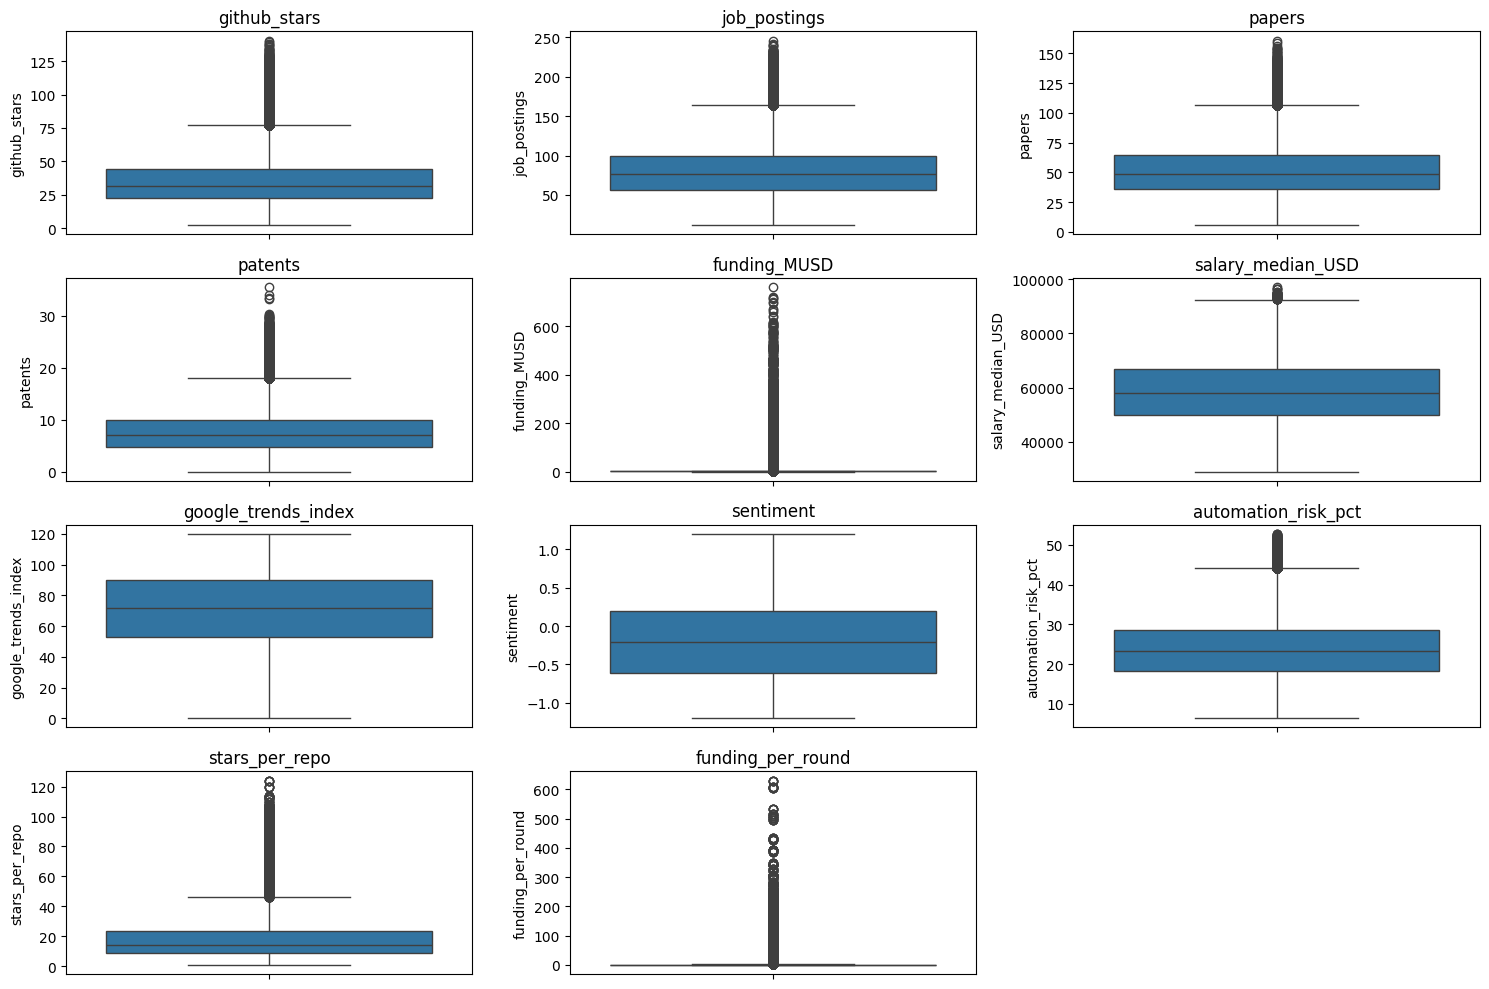

In [37]:
# Boxplots
import seaborn as sns

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


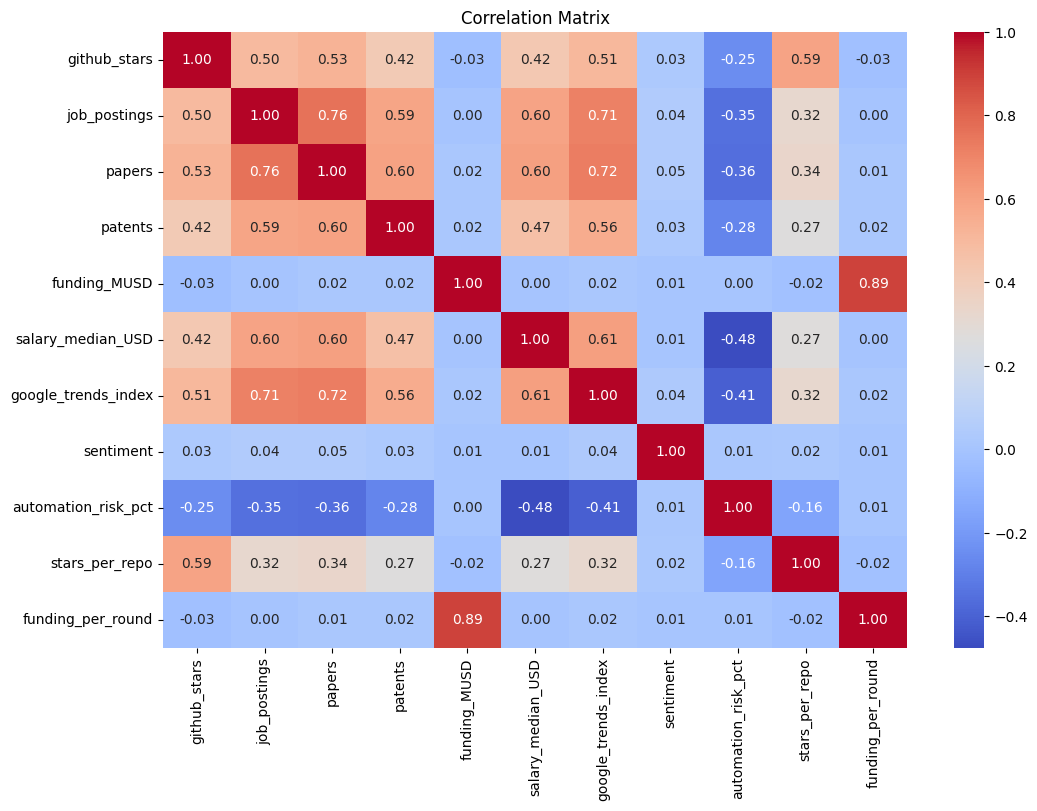

In [38]:
# --- 5. Correlation heatmap ---
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

/tmp/ipython-input-823704466.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['funding_MUSD'].resample('M').sum().plot(title='Monthly Funding Over Time')


<Axes: title={'center': 'Monthly Funding Over Time'}, xlabel='date'>

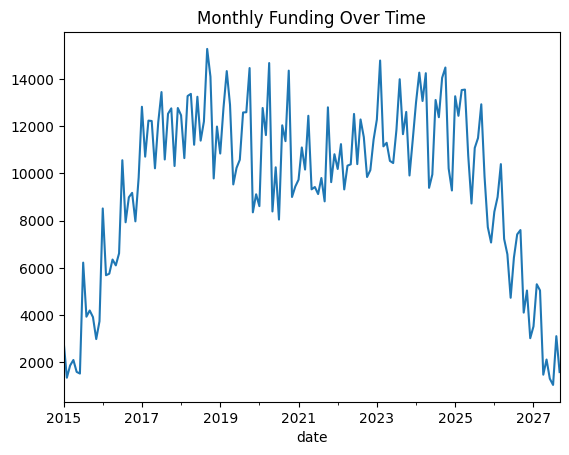

In [39]:
#Trends over time: Check how key metrics evolve.

df.set_index('date', inplace=True)
df['funding_MUSD'].resample('M').sum().plot(title='Monthly Funding Over Time')

/tmp/ipython-input-2391178432.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([df.index.to_period('M'),'theme'])['funding_MUSD'].sum().unstack().plot(figsize=(12,6))


<Axes: xlabel='date'>

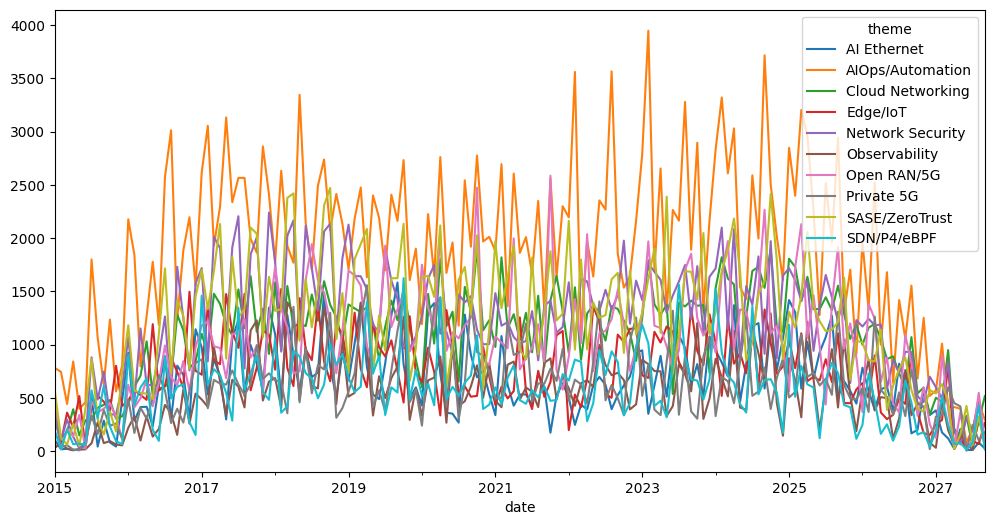

In [40]:
#Compare themes or geographies over time:
df.groupby([df.index.to_period('M'),'theme'])['funding_MUSD'].sum().unstack().plot(figsize=(12,6))


# **Categorical Analysis**

<Axes: title={'center': 'Geography Distribution'}, xlabel='geography'>

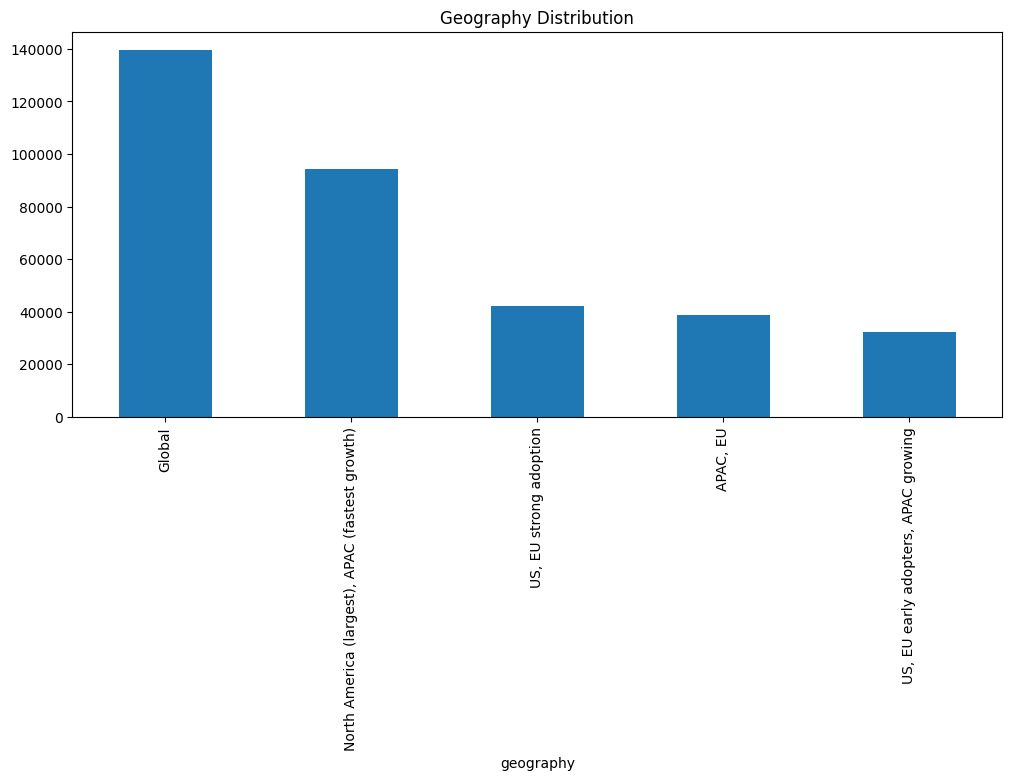

In [41]:
df['theme'].value_counts().plot(kind='bar', figsize=(12,5), title='Theme Distribution')
df['geography'].value_counts().plot(kind='bar', figsize=(12,5), title='Geography Distribution')


# **Check how numeric variables differ across categories:**

<Axes: xlabel='theme', ylabel='funding_MUSD'>

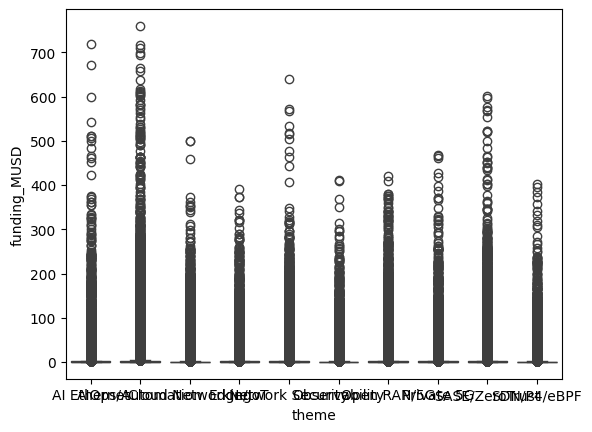

In [42]:
sns.boxplot(x='theme', y='funding_MUSD', data=df)


In [46]:
pd.pivot_table(df, index='theme', columns='geography', values='funding_MUSD', aggfunc='mean')


/tmp/ipython-input-4158476976.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df, index='theme', columns='geography', values='funding_MUSD', aggfunc='mean')


geography,"APAC, EU",Global,"North America (largest), APAC (fastest growth)","US, EU early adopters, APAC growing","US, EU strong adoption"
theme,,,,,
AI Ethernet,NaN,5.250276,NaN,NaN,NaN
AIOps/Automation,NaN,NaN,6.371975,NaN,NaN
Cloud Networking,NaN,NaN,3.417881,NaN,NaN
Edge/IoT,NaN,3.937090,NaN,NaN,NaN
Network Security,NaN,4.431418,NaN,NaN,NaN
Observability,NaN,3.696659,NaN,NaN,NaN
Open RAN/5G,4.834766,NaN,NaN,NaN,NaN
Private 5G,NaN,NaN,NaN,4.915392,NaN
SASE/ZeroTrust,NaN,NaN,NaN,NaN,4.799283


In [48]:
import pandas as pd

# Create pivot table
pivot_funding = pd.pivot_table(
    df,
    index='theme',              # Rows: themes
    columns='geography',        # Columns: geographies
    values='funding_MUSD',      # Values: funding
    aggfunc='mean',             # Aggregation: mean funding
    fill_value=0                # Replace NaN with 0
)

# Sort themes by overall average funding
pivot_funding['Average'] = pivot_funding.mean(axis=1)
pivot_funding = pivot_funding.sort_values('Average', ascending=False)

# Drop the temporary 'Average' column for presentation if you like
# pivot_funding = pivot_funding.drop(columns='Average')

# Display
print(pivot_funding)


geography         APAC, EU    Global  \
theme                                  
AIOps/Automation  0.000000  0.000000   
AI Ethernet       0.000000  5.250276   
Private 5G        0.000000  0.000000   
Open RAN/5G       4.834766  0.000000   
SASE/ZeroTrust    0.000000  0.000000   
Network Security  0.000000  4.431418   
Edge/IoT          0.000000  3.937090   
Observability     0.000000  3.696659   
Cloud Networking  0.000000  0.000000   
SDN/P4/eBPF       0.000000  3.386416   

geography         North America (largest), APAC (fastest growth)  \
theme                                                              
AIOps/Automation                                        6.371975   
AI Ethernet                                             0.000000   
Private 5G                                              0.000000   
Open RAN/5G                                             0.000000   
SASE/ZeroTrust                                          0.000000   
Network Security                           

/tmp/ipython-input-1711295165.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_funding = pd.pivot_table(


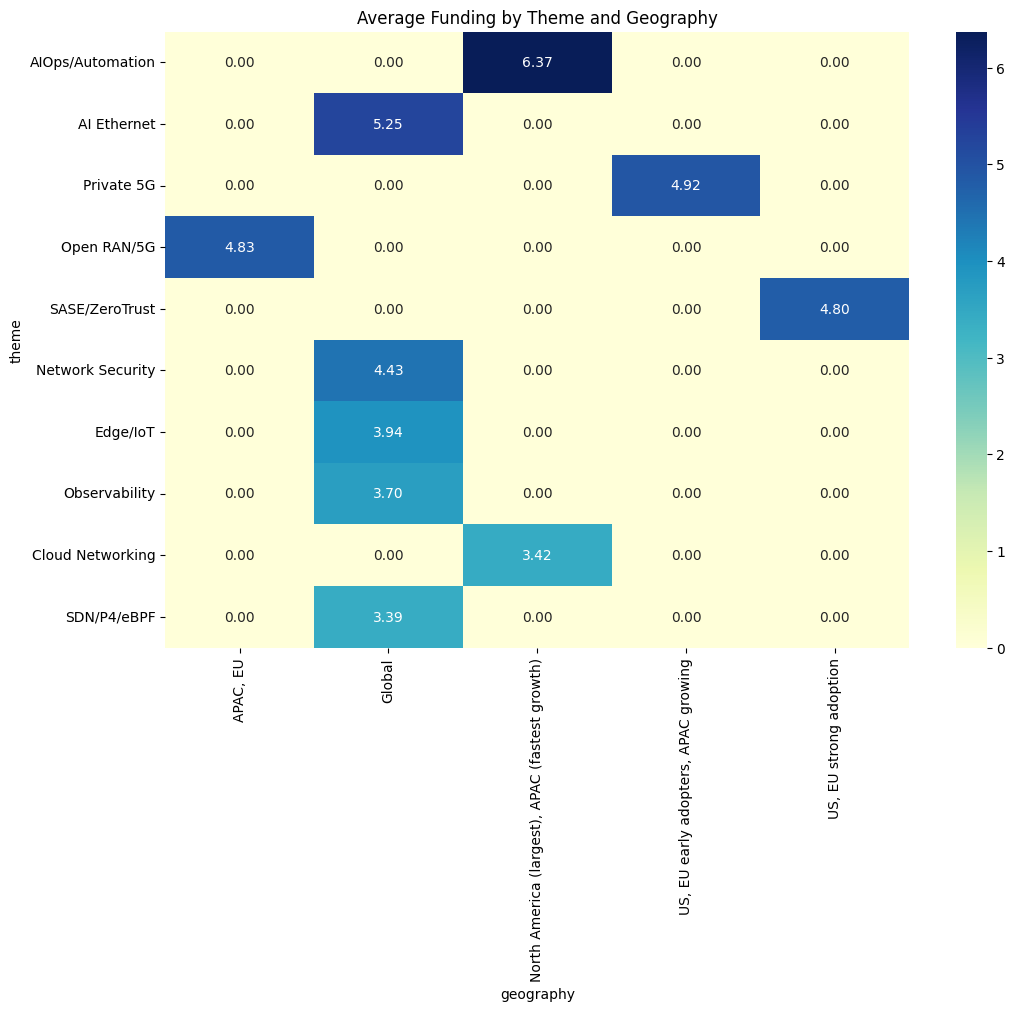

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(pivot_funding.drop(columns='Average'), annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Average Funding by Theme and Geography')
plt.show()


# **Trend Analysis Over Time**

In [61]:
import matplotlib.pyplot as plt

top_themes = ['AIOps/Automation', 'AI Ethernet', 'Private 5G']
df_top = df[df['theme'].isin(top_themes)]

monthly_funding = df_top.groupby([pd.Grouper(key='date', freq='M'), 'theme'])['funding_MUSD'].sum().unstack()
monthly_funding.plot(figsize=(12,6), marker='o')
plt.title('Monthly Funding Trends for Top Themes')
plt.ylabel('Funding (M USD)')
plt.xlabel('Month')
plt.grid(True)
plt.show()


/tmp/ipython-input-3867483667.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_funding = df_top.groupby([pd.Grouper(key='date', freq='M'), 'theme'])['funding_MUSD'].sum().unstack()


KeyError: 'The grouper name date is not found'

In [52]:
print(df.columns)


Index(['theme', 'source', 'github_stars', 'job_postings', 'papers', 'patents',
       'funding_MUSD', 'salary_median_USD', 'google_trends_index', 'sentiment',
       'automation_risk_pct', 'geography', 'lead_vendors', 'stars_per_repo',
       'funding_per_round', 'inter_theme_relationship'],
      dtype='object')


# **Categorical vs Numeric Analysis**

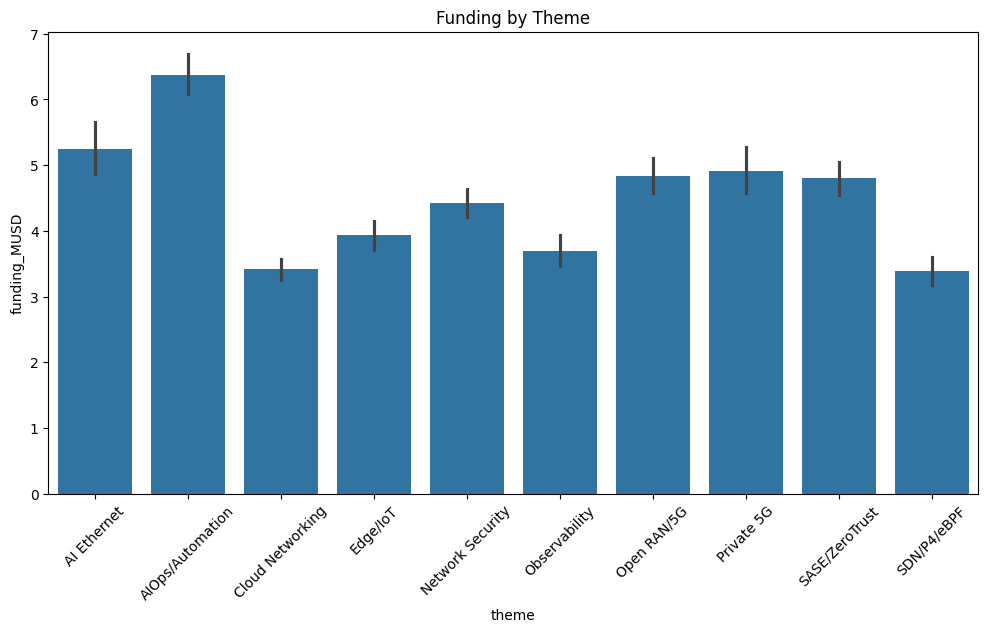

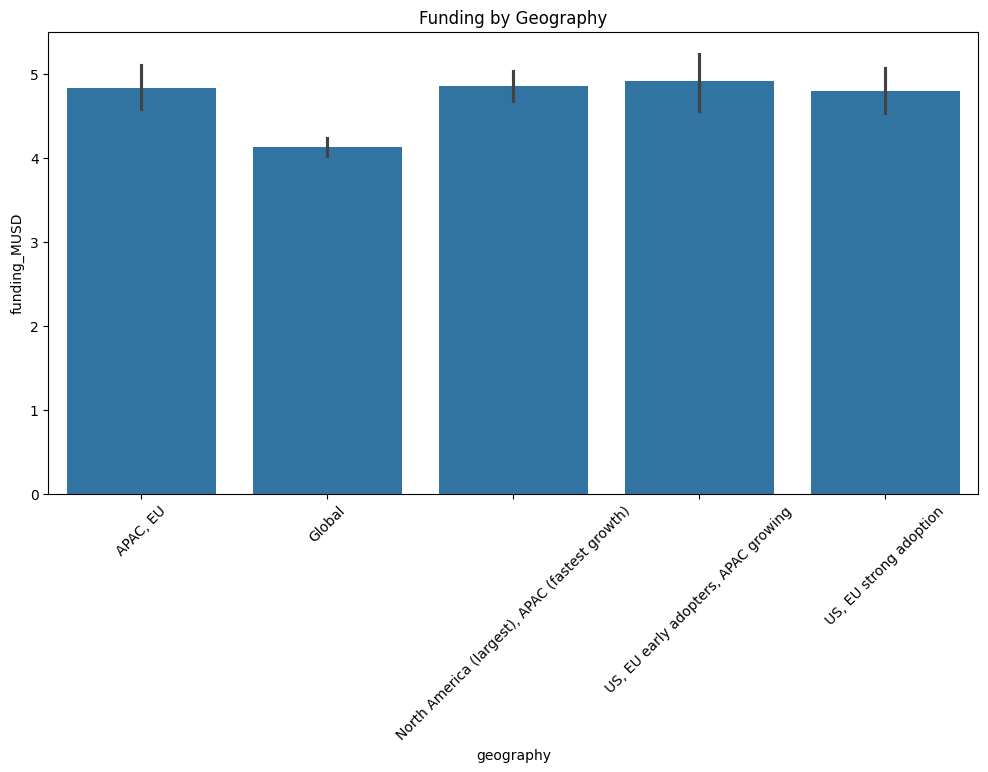

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Funding distribution by theme
plt.figure(figsize=(12,6))
sns.barplot(x='theme', y='funding_MUSD', data=df)
plt.xticks(rotation=45)
plt.title("Funding by Theme")
plt.show()

# Funding distribution by geography
plt.figure(figsize=(12,6))
sns.barplot(x='geography', y='funding_MUSD', data=df)
plt.xticks(rotation=45)
plt.title("Funding by Geography")
plt.show()


# **Correlation and multivariate analysis**

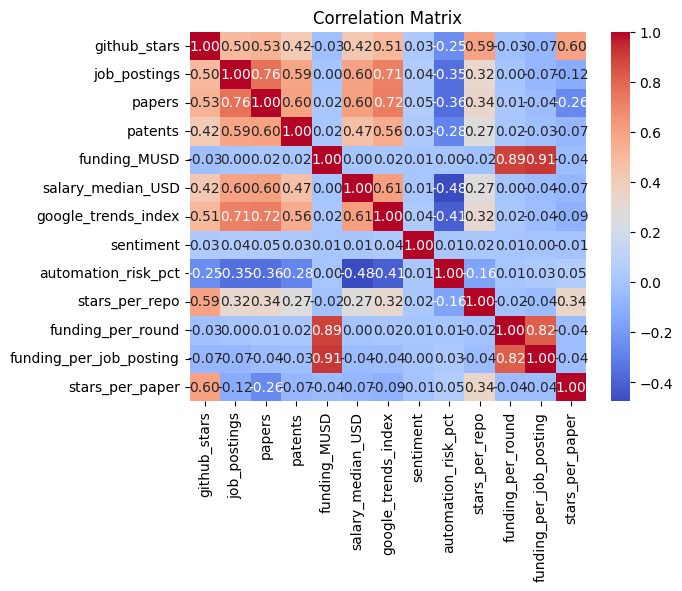

In [66]:
numeric_cols = df.select_dtypes(include='number').columns
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# **Feature engineering / ratios**

In [67]:
df['funding_per_job_posting'] = df['funding_MUSD'] / (df['job_postings'] + 1)  # avoid div by zero
df['stars_per_paper'] = df['github_stars'] / (df['papers'] + 1)


# **Trend Analysis**

/tmp/ipython-input-94153867.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_funding = df_top.groupby([pd.Grouper(key='date', freq='M'), 'theme'])['funding_MUSD'].sum().unstack()


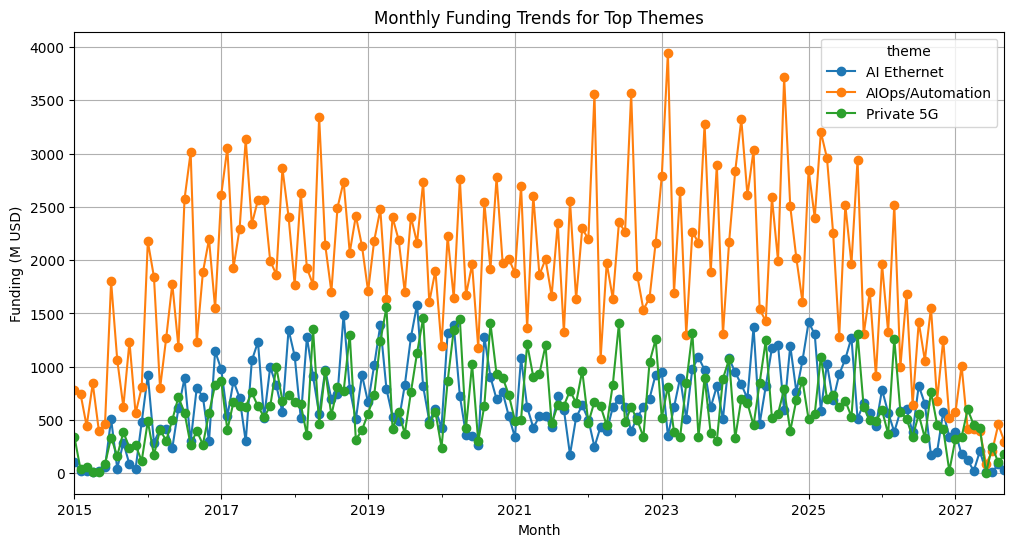

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'])

# Filter top themes
top_themes = ['AIOps/Automation', 'AI Ethernet', 'Private 5G']
df_top = df[df['theme'].isin(top_themes)]

# Group by month and theme
monthly_funding = df_top.groupby([pd.Grouper(key='date', freq='M'), 'theme'])['funding_MUSD'].sum().unstack()
monthly_funding = monthly_funding.fillna(0)  # Optional

# Plot
monthly_funding.plot(figsize=(12,6), marker='o')
plt.title('Monthly Funding Trends for Top Themes')
plt.ylabel('Funding (M USD)')
plt.xlabel('Month')
plt.grid(True)
plt.show()


In [77]:
top_geographies = df.groupby('geography')['funding_MUSD'].sum().sort_values(ascending=False).head(5).index
df_geo = df[df['geography'].isin(top_geographies)]


/tmp/ipython-input-341584716.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_geo_funding = df_geo.groupby([pd.Grouper(key='date', freq='M'), 'geography'])['funding_MUSD'].sum().unstack()


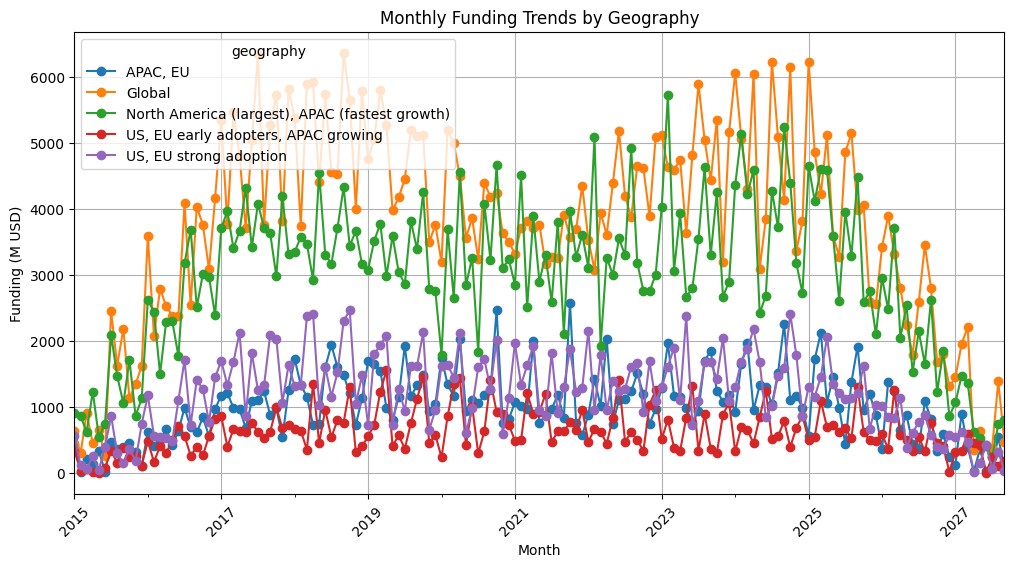

In [79]:
monthly_geo_funding = df_geo.groupby([pd.Grouper(key='date', freq='M'), 'geography'])['funding_MUSD'].sum().unstack()
monthly_geo_funding = monthly_geo_funding.fillna(0)
import matplotlib.pyplot as plt

monthly_geo_funding.plot(figsize=(12,6), marker='o')
plt.title('Monthly Funding Trends by Geography')
plt.ylabel('Funding (M USD)')
plt.xlabel('Month')
plt.grid(True)
plt.xticks(rotation=45)  # Makes month labels readable
plt.show()



Stacked bar chart to see total funding distribution by geography per month


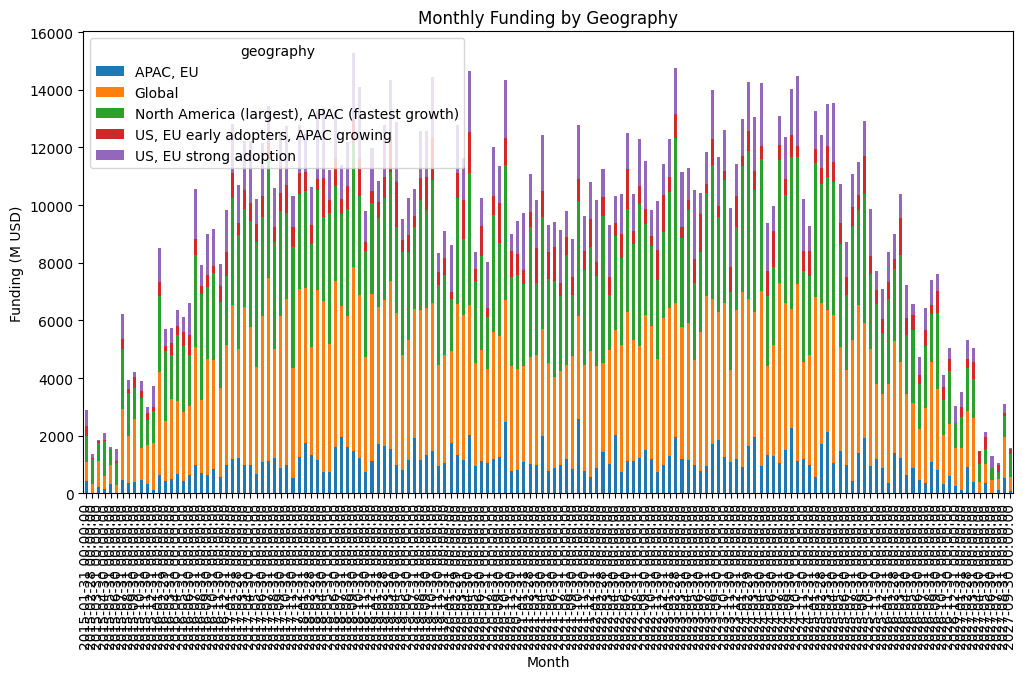

In [80]:
monthly_geo_funding.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Monthly Funding by Geography')
plt.ylabel('Funding (M USD)')
plt.xlabel('Month')
plt.show()


# **Percentage contribution per month:**

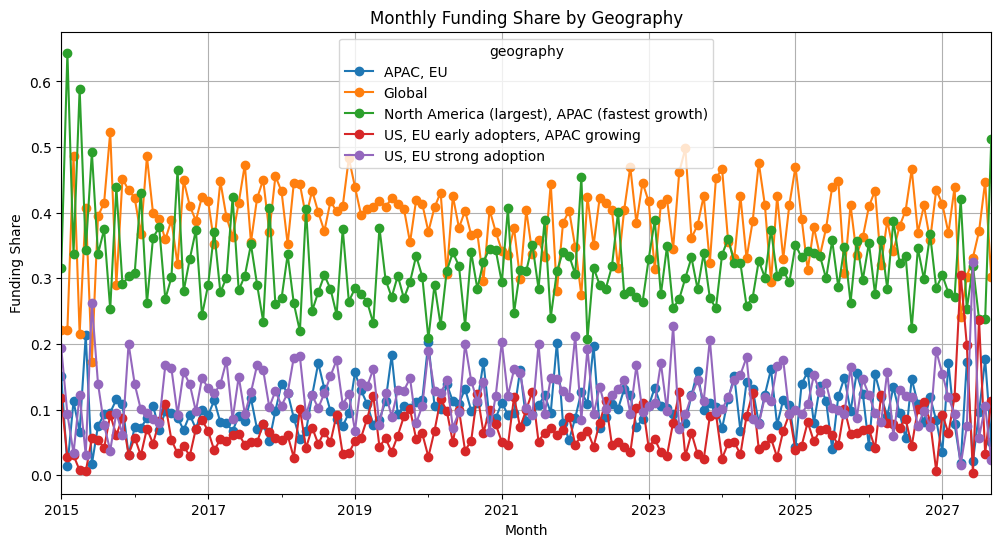

In [81]:
monthly_geo_funding_pct = monthly_geo_funding.div(monthly_geo_funding.sum(axis=1), axis=0)
monthly_geo_funding_pct.plot(figsize=(12,6), marker='o')
plt.title('Monthly Funding Share by Geography')
plt.ylabel('Funding Share')
plt.xlabel('Month')
plt.grid(True)
plt.show()


***Geographic Urgency Analysis***

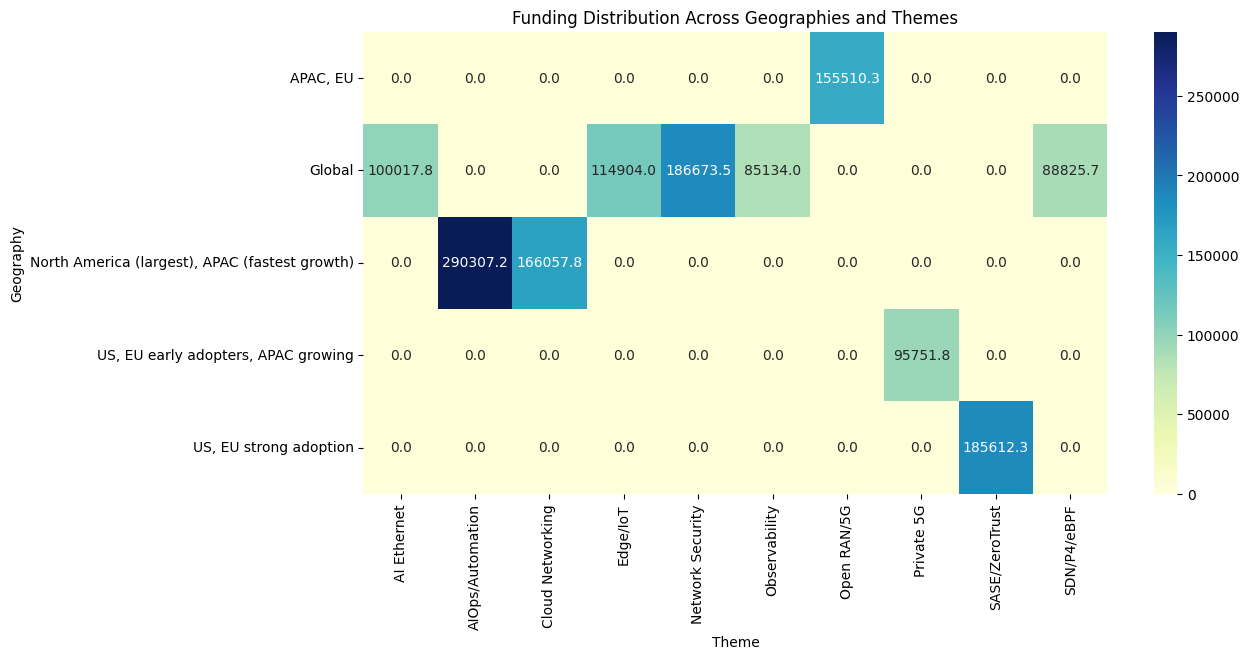

In [82]:
geo_theme = df.groupby(['geography', 'theme'])['funding_MUSD'].sum().unstack().fillna(0)

# Heatmap for visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(geo_theme, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Funding Distribution Across Geographies and Themes')
plt.ylabel('Geography')
plt.xlabel('Theme')
plt.show()


# **Automation Risk vs Human Impact**

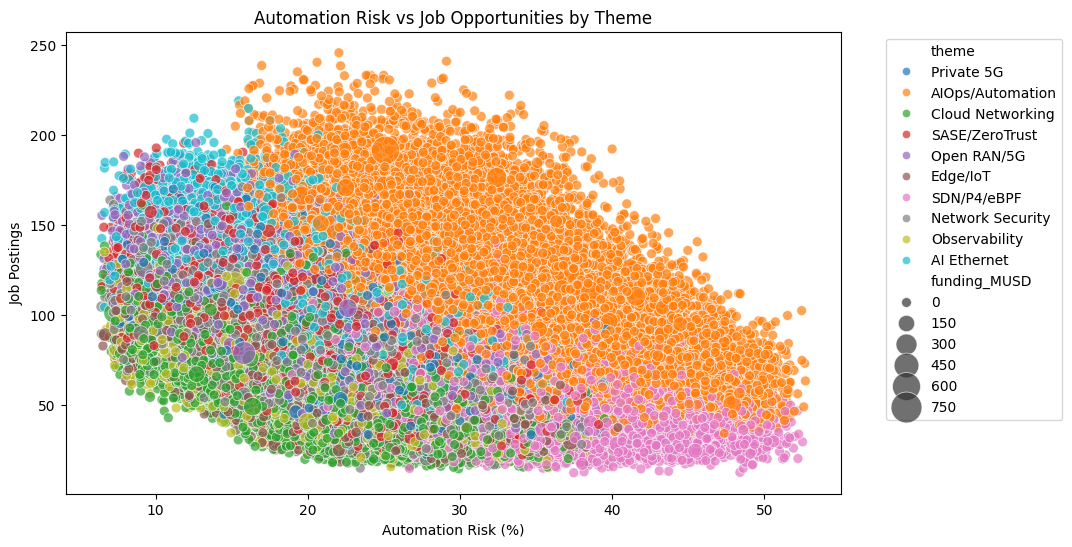

In [83]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='automation_risk_pct', y='job_postings', hue='theme', size='funding_MUSD', sizes=(50,500), alpha=0.7)
plt.title('Automation Risk vs Job Opportunities by Theme')
plt.xlabel('Automation Risk (%)')
plt.ylabel('Job Postings')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# **Current Market Landscape**

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'])

# Focus on Network Engineering subdomains
network_themes = ['Private 5G', 'SD-WAN', 'AI Ethernet', 'Network Automation']
df_network = df[df['theme'].isin(network_themes)]


/tmp/ipython-input-4275858417.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_funding = df_network.groupby([pd.Grouper(key='date', freq='M'), 'theme'])['funding_MUSD'].sum().unstack().fillna(0)


<Figure size 1200x600 with 0 Axes>

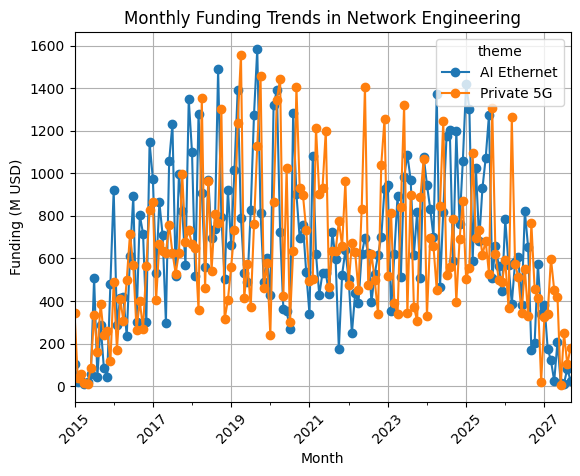

In [85]:
monthly_funding = df_network.groupby([pd.Grouper(key='date', freq='M'), 'theme'])['funding_MUSD'].sum().unstack().fillna(0)

# Plot monthly funding trends
plt.figure(figsize=(12,6))
monthly_funding.plot(marker='o')
plt.title('Monthly Funding Trends in Network Engineering')
plt.ylabel('Funding (M USD)')
plt.xlabel('Month')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-3785251677.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_jobs = df_network.groupby([pd.Grouper(key='date', freq='M'), 'theme'])['job_postings'].sum().unstack().fillna(0)


<Figure size 1200x600 with 0 Axes>

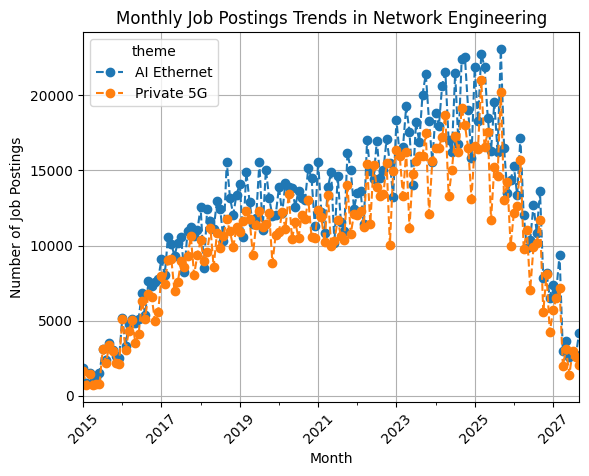

In [86]:
monthly_jobs = df_network.groupby([pd.Grouper(key='date', freq='M'), 'theme'])['job_postings'].sum().unstack().fillna(0)

# Plot job postings trends
plt.figure(figsize=(12,6))
monthly_jobs.plot(marker='o', linestyle='--')
plt.title('Monthly Job Postings Trends in Network Engineering')
plt.ylabel('Number of Job Postings')
plt.xlabel('Month')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


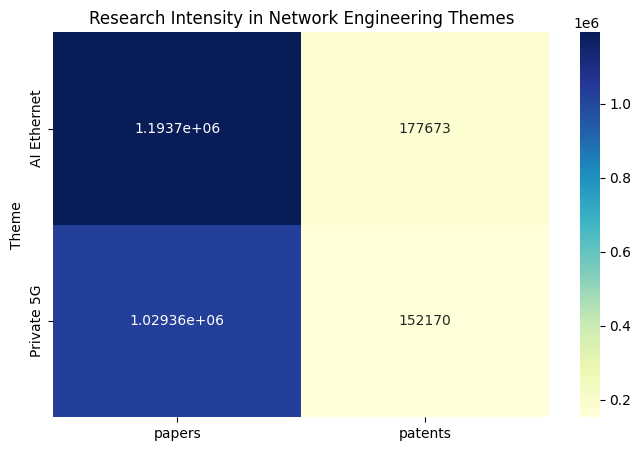

In [87]:
research_metrics = df_network.groupby('theme')[['papers','patents']].sum()

# Heatmap: research intensity
plt.figure(figsize=(8,5))
sns.heatmap(research_metrics, annot=True, cmap="YlGnBu", fmt="g")
plt.title('Research Intensity in Network Engineering Themes')
plt.ylabel('Theme')
plt.show()


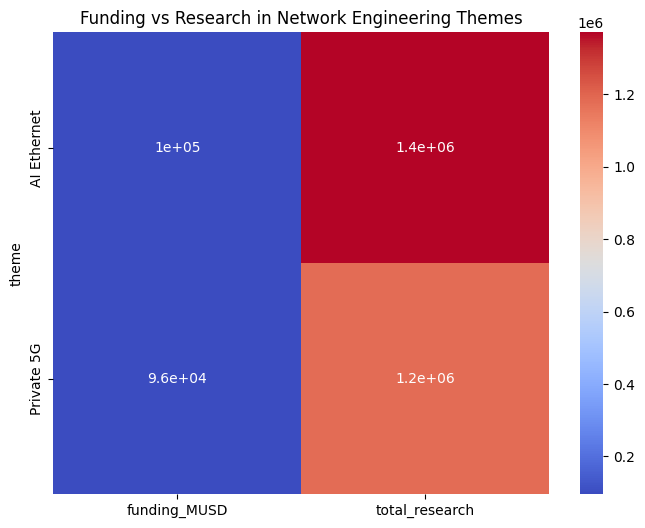

In [88]:
combined = df_network.groupby('theme')[['funding_MUSD','papers','patents']].sum()
combined['total_research'] = combined['papers'] + combined['patents']

plt.figure(figsize=(8,6))
sns.heatmap(combined[['funding_MUSD','total_research']], annot=True, cmap='coolwarm')
plt.title('Funding vs Research in Network Engineering Themes')
plt.show()
